# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment you will be able to :

* understand Fashion-MNIST dataset
* classify Fashion-MNIST data using neural networks


In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/aiml_batch_15/preview_videos/Fashion_MNIST.mp4" type="video/mp4">
</video>
""")

## Dataset

### History

The original MNIST dataset contains handwritten digits. People from AI/ML or Data Science community love this dataset. They use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset they would try on. As per popular belief, If the algorithm doesn’t work on MNIST, it won’t work at all. Well, if algorithm works on MNIST, it may still fail on other datasets.


As per the original [paper](https://arxiv.org/abs/1708.07747) describing about Fashion-MNIST, It is a dataset recomposed from the product pictures of Zalando’s websites. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

There are some good reasons for the challenges faced by MNIST dataset:

* MNIST is too easy - Neural networks can achieve 99.7% on MNIST easily, and similarly, even classic ML algorithms can achieve 97%. 

* MNIST is overused - Almost everyone who has experience with deep learning has come across MNIST at least once.

* MNIST cannot represent modern CV task





### Description

The dataset choosen for this experiment is Fashion-MNIST. The dataset is made up of 28x28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images and the test set has 10,000 images. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

**Labels / Classes**

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

## Setup Steps

In [1]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id="2100121"#@param{type:"string"}

In [4]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password="5142192291"#@param{type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="U3W13_22_Fashion_MNIST_A" #name of the notebook

def setup():
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    print ("Setup completed successfully")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing the Required Packages

* First, we import pytorch, the deep learning library which we’ll be using, and torchvision, which provides our dataset and data transformations. 

* We also import torch.nn (pytorch’s neural network library), torch.nn.functional (includes non-linear functions like ReLu and sigmoid) and torch.optim for implementing various optimization algorithms.

In [5]:
# Importing torch packages
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

### Initializing CUDA

CUDA is used as an interface between our code and the GPU.

Normally, we run the code in the CPU. To run it in the GPU, we need CUDA. Check if CUDA is available:

In [6]:
# To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 1.7.0+cu101 CUDA: True


If it's False, then we run the program on CPU. If it's True, then we run the program on GPU.

Let us initialize some GPU-related variables:

In [7]:
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

### Load Fashion MNIST data

Now, we'll load the Fashion MNIST data. For the first time, we may have to download the data, which can take a while.

Now, 

* We will load both the training set and the testing sets 

* We will use  transform.compose() to convert the datasets into tensors using transforms.ToTensor(). We also normalize them by setting the mean and standard deviation using transforms.Normalize().



In [8]:
# Normalize the data with mean and std (0.2860 and 0.3530 are the mean and std for Fashion MNIST data)
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.2860,), (0.3530,))])

In [9]:
# Downloading the Training set
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = True, transform=transform, download=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [10]:
# Loading the downloaded training set
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=64)

In [11]:
# Downloading the testing set
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train= False, transform=transform, download = True)

In [12]:
# Loading the downloaded testing set
testloader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=64)

The train and test data are provided via data loaders that provide iterators over the datasets.

The first element of training data (X_train) is a 4th-order tensor of size (batch_size, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels. y_train is a vector containing the correct classes ("0", "1", ..., "9") for each training image. Here batch size is 64.


In [13]:
for (X_train, y_train) in trainloader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor


### Plotting first 25 images

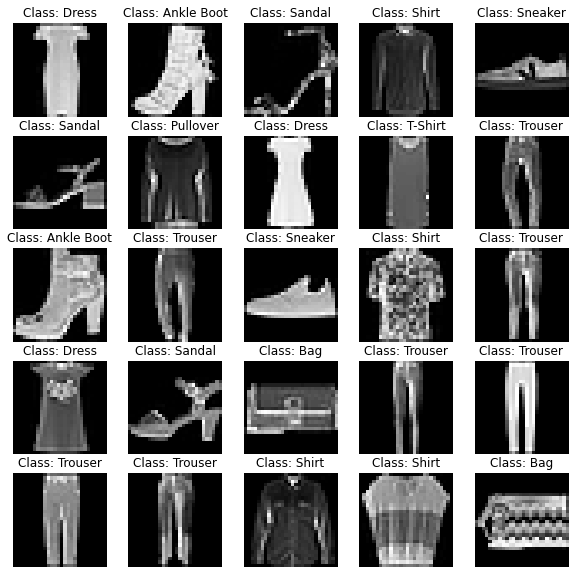

In [15]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
              
# YOUR CODE HERE : Plot first 25  training images 
pltsize=1
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    # Convert the tensor to numpy for displaying the image
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray")
    plt.title('Class: '+labels_map[int(str(y_train[i])[-2])])

### Defining the CNN’s Architecture

Neural Networks are inherited from the nn.Module class.

Now let us define a neural network. Here we are using two functions \__init__ and forward function.

In the \__init__  function, we define the layers using the provided modules from the nn package. The forward function is called on the Neural Network for a set of inputs, and it passes that input through the different layers that have been defined. 




#### CNN Architecture Flow

*  In forward() function we pass input (X) to the first convolution layer, then apply RELU on the first convolution layer where, the size changes from (1, 28, 28) to (8, 28, 28) and then apply max pool layer, the size changes from (8, 28, 28) to (8, 14, 14)

*  Next, pass the output of the max pool layer to the second convolution layer and then apply RELU on the second convolution where, the size changes from (8, 14, 14) to (16, 14, 14) and then apply max pool layer, the size changes from (16, 14, 14) to (16, 7, 7)

*  Reshape data to the input layer of the neural network, the size changes from (16, 7, 7) to (1, 784)

* Apply first fully connected layer on the reshaped data, then apply RELU on the first fully connected layer the size changes from (1, 784) to (1, 256), then apply second fully connected layer, the size changes from (1, 256) to (1, 128), then third fully connected layer, the size changes from (1, 128) to (1, 64), then fourth fully connected layer, the size changes from (1, 64) to (1, 10)



In [21]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
    
        # Defining first convolution layer with input_channels = 1, output_channels = 8, kernel_size = 3
        self.conv1 = nn.Conv2d(in_channels= 1, out_channels= 8, kernel_size= 3, padding=1) 
        # Batch normalization
        self.bn1 = nn.BatchNorm2d(8)
        # Defining second convolution layer with input_channels = 8, output_channels = 16, kernel_size = 3               
        self.conv2 = nn.Conv2d(in_channels= 8, out_channels= 16, kernel_size= 3, padding =1)
        # Batch normalization
        self.bn2 = nn.BatchNorm2d(16)

        # YOUR CODE HERE : Define four linear layers where input size of each layer is 784, 256, 128, 64 respectively.
        # HINT : Refer to 'nn.linear' function from 'PyTorch' for easy start
        # 784 input features, 256 output features 
        self.fc1 = nn.Linear(16*7*7, 126) #64, 32, 2, 2
        # 256 input features, 128 output features 
        self.fc2 = nn.Linear(126, 126)
        # 128 input features, 64 output features 
        self.fc3 = nn.Linear(126, 64)
        # 64 input features, 10 output features for our 10 defined classes
        self.fc4 = nn.Linear(64, 10) 
        
        # YOUR CODE HERE : Define max pool layer with filter size (2, 2)
        self.pool = nn.MaxPool2d(kernel_size=2)
    
    def forward(self, x):
        # Convolutional layers with ReLU activation and max pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.bn2(x)

        print(x.shape, 'output  of bn2')

        # Flatten the image
        x = x.view(-1, 16*7*7)   # Output shape of convolutional layer is 16*7*7 

        # Linear layers with RELU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

#### Calling the instances of the network

In [22]:
model = Model()
model = model.to(device)

#### Defining the loss function and optimizer

In [18]:
criterion = nn.CrossEntropyLoss() # YOUR CODE HERE : Explore and declare loss function
optimizer = optim.SGD(model.parameters(), lr = 0.5)

#### Training and Evaluating the model

In Training Phase, we iterate over a batch of images in the train_loader. For each batch, we perform  the following steps:

* First we zero out the gradients using zero_grad()

* We pass the data to the model i.e. we perform forward pass by calling the forward()

* We calculate the loss using the actual and predicted labels

* Perform Backward pass using backward() to update the weights

In [24]:
# No of Epochs
epoch = 1

# keeping the network in train mode
model.train()
train_losses, train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in trainloader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # YOUR CODE HERE : # Zero the parameter gradients 'zero_grad' function
      optimizer.zero_grad()
    
    
      outputs = model(images) # YOUR CODE HERE : Perform forward pass by passing 'images' to the 'model' as input

      loss = criterion(outputs, labels) # YOUR CODE HERE : Calculate the loss using 'criterion' (loss function) defined above
      train_loss += loss.item()

      # YOUR CODE HERE :  Perform backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1) # YOUR CODE HERE : Pick the class or label with maximum probability
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(trainset))
    train_accuracy.append(100 * correct/len(trainset))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output 

In Testing Phase, we iterate over a batch of images in the test_loader. For each batch we perform the following steps:

* We pass the images through the model (network) to get the outputs
* Pick the class / label with the highest probability
* Calculate the accuracy

In [25]:
# Keeping the network in evaluation mode 
model.eval()  

test_loss = 0
Test_accuracy = 0

# Iterate through all the batches in each epoch
for images,labels in testloader:

    images = images.to(device) # YOUR CODE HERE : Convert the images to gpu for faster execution
    labels = labels.to(device) # YOUR CODE HERE : Convert the labels to gpu for faster execution

    # Passing images to the model, which return the probabilites as outputs
    outputs = model(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()

Accuracy = 100 * Test_accuracy / len(testset)
print("Accuracy is",Accuracy)

torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output  of bn2
torch.Size([64, 16, 7, 7]) output 

### Please answer the questions below to complete the experiment:

In [26]:
#@title State TRUE or FALSE: nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width
Answer = "TRUE" #@param ["","TRUE", "FALSE"] 


In [27]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [29]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nn" #@param {type:"string"}


In [30]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [31]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [32]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [33]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [34]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 11204
Date of submission:  12 Dec 2020
Time of submission:  01:58:32
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
